import pandas as pd

In [5]:
import pandas as pd
Data=pd.read_excel("bike.xlsx",sheetname="data")

C:\Users\Marta\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [6]:
#descriptives
#I have already deleted the column with the codes of customers
Data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,1,3,3,1,5,6,2,4,1,1,...,3,3,3,1,4,6,5,1,0,2
1,2,10,13,11,11,7,11,10,1,0,...,6,10,18,13,11,6,8,6,6,7
2,3,1,3,4,4,4,3,7,0,3,...,1,1,1,2,0,0,0,1,0,1
3,4,2,0,0,3,1,1,3,2,5,...,7,5,4,6,4,9,3,4,4,3
4,5,10,7,3,4,6,3,7,1,3,...,0,0,1,1,1,0,0,0,0,0


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 98 columns):
Row Labels    30 non-null int64
1             30 non-null int64
2             30 non-null int64
3             30 non-null int64
4             30 non-null int64
5             30 non-null int64
6             30 non-null int64
7             30 non-null int64
8             30 non-null int64
9             30 non-null int64
10            30 non-null int64
11            30 non-null int64
12            30 non-null int64
13            30 non-null int64
14            30 non-null int64
15            30 non-null int64
16            30 non-null int64
17            30 non-null int64
18            30 non-null int64
19            30 non-null int64
20            30 non-null int64
21            30 non-null int64
22            30 non-null int64
23            30 non-null int64
24            30 non-null int64
25            30 non-null int64
26            30 non-null int64
27            30 non-null int64
2

In [8]:
#check if there are any missing cases
Data.isnull().values.any()

False

In [12]:
#We see that there are no missing values, so we do not need to drop any cases
#We can now start k-means clustering by running it with an intuitive number of k-s at first
from sklearn.cluster import KMeans
Train = Data.iloc[:,1:]
cluster = KMeans(4)
Train.head()

,1,2,3,4,5,6,7,8,9,10,...,88,89,90,91,92,93,94,95,96,97
0,3,3,1,5,6,2,4,1,1,0,...,3,3,3,1,4,6,5,1,0,2
1,10,13,11,11,7,11,10,1,0,1,...,6,10,18,13,11,6,8,6,6,7
2,1,3,4,4,4,3,7,0,3,4,...,1,1,1,2,0,0,0,1,0,1
3,2,0,0,3,1,1,3,2,5,2,...,7,5,4,6,4,9,3,4,4,3
4,10,7,3,4,6,3,7,1,3,6,...,0,0,1,1,1,0,0,0,0,0


,Row Labels,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,cluster
0,1,3,3,1,5,6,2,4,1,1,...,3,3,1,4,6,5,1,0,2,0
1,2,10,13,11,11,7,11,10,1,0,...,10,18,13,11,6,8,6,6,7,3
2,3,1,3,4,4,4,3,7,0,3,...,1,1,2,0,0,0,1,0,1,0
3,4,2,0,0,3,1,1,3,2,5,...,5,4,6,4,9,3,4,4,3,0
4,5,10,7,3,4,6,3,7,1,3,...,0,1,1,1,0,0,0,0,0,0


In [18]:
#Elbow method
import numpy as np
K=range(1,10)
np.random.seed(42)
sse={}
for k in K:
    bike_cluster=KMeans(k)
    Data['bike_cluster']=bike_cluster.fit_predict(Train)
    sse[k] = bike_cluster.inertia_
sse

{1: 145131.66666666666,
 2: 49650.142857142855,
 3: 35685.66666666667,
 4: 25565.413043478264,
 5: 17552.413043478264,
 6: 13918.88888888889,
 7: 11103.779487179487,
 8: 8856.366666666667,
 9: 7603.0}

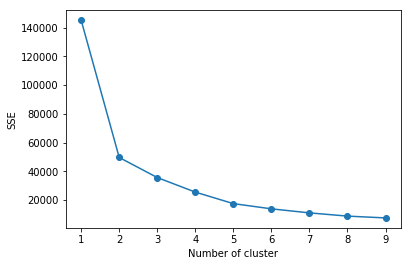

In [21]:
#Plotting
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sse.keys(),sse.values(), marker="o") 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [20]:
#The plot confidently tells us to have 2 clusters, but before picking only 2 clusters, let's also use the Silhouette method. Although the Elbow method tells us to have 2 clusters, we can also try the Silhouette method.

#Silhouette
from sklearn.metrics import silhouette_score
np.random.seed(42)
sil_coef={}
for k in range (2,10): 
    bike_cluster=KMeans(k)
    Data['bike_cluster']=bike_cluster.fit_predict(Train)
    sil_coef[k]=silhouette_score(Train,bike_cluster.labels_,metric='euclidean')
    
sil_coef

{2: 0.7562387361982662,
 3: 0.4370187871254986,
 4: 0.46108535765610165,
 5: 0.4428614207752469,
 6: 0.26672762140985995,
 7: 0.22029973028305208,
 8: 0.2152153429833446,
 9: 0.21897775637774522}

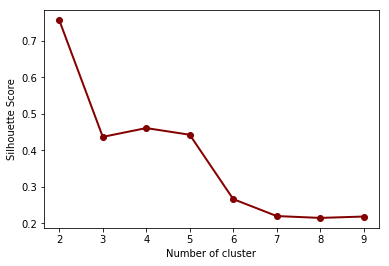

In [22]:
#plotting
plt.figure()
plt.plot(sil_coef.keys(),sil_coef.values(), color='#840101',linewidth=2,marker='o') 
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [33]:
#Both of the plots idicate efficient number of clusters 2
np.random.seed(42)

cluster = KMeans(2).fit_predict(Train)
cluster



array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

# Data["cluster"].value_counts()

In [36]:
#Now let's count the number of observations in each cluster
np.random.seed(42)
Train["cluster"] = KMeans(2).fit_predict(Train)
Train


C:\Users\Marta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,93,94,95,96,97,cluster
0,3,3,1,5,6,2,4,1,1,0,...,3,3,1,4,6,5,1,0,2,0
1,10,13,11,11,7,11,10,1,0,1,...,10,18,13,11,6,8,6,6,7,0
2,1,3,4,4,4,3,7,0,3,4,...,1,1,2,0,0,0,1,0,1,0
3,2,0,0,3,1,1,3,2,5,2,...,5,4,6,4,9,3,4,4,3,0
4,10,7,3,4,6,3,7,1,3,6,...,0,1,1,1,0,0,0,0,0,0
5,9,6,8,9,9,7,4,1,4,3,...,0,0,0,0,0,0,0,0,1,0
6,4,5,1,2,2,2,9,2,2,6,...,4,2,4,2,2,3,5,4,4,0
7,3,2,4,2,2,5,13,15,18,17,...,36,37,25,31,34,29,38,33,32,1
8,1,2,5,2,3,1,11,5,7,5,...,5,4,5,5,8,13,5,10,5,0
9,3,4,3,3,1,8,27,29,26,22,...,48,50,47,49,48,32,52,59,58,1


In [38]:
Train.to_excel('cluster.xlsx')